# Topic modelling with news headlines


## Problem Statement

Time to put your understanding of Topic Modelling into practice! You have a dataset of news headlines sourced from the reputable Australian news source ABC (Australian Broadcasting Corp.) over a period of 15 years. If you dig into the keywords, you will see all the important episodes shaping the last decade and how they evolved over time. Ex: financial crisis, iraq war, multiple US elections, ecological disasters, terrorism, famous people, Australian crimes etc. A much better way to comprehend these topics would be using topic modelling to find out relevant topics within a particular time frame.

The main goal of this problem is to leverage the power of techniques like LSA (Latent Semantic Analysis) and LDA (Latent Dirichlet Allocation) to assign topics to unseen news headlines.


## About the dataset

The dataset includes the entire corpus of articles published by the ABC website in the given time range. With a volume of 200 articles per day and a good focus on international news, we can be fairly certain that every event of significance has been captured here. In total there are 331100 instances of data available with two columns.

The columns in this dataset are:

- **`publish_date`**: Date of publish of the news headline
- **`headline_text`**: Headline of the news published on that particular date


## Why solve it

Solving it will help you apply the following skills:
- Text preprocessing techniques like tokenization, stopword removal, POS tagging etc.
- Enhance your data visualization skills
- Topic modelling with LSA (Latent Semantic Analysis) and LDA (Latent Dirichlet Allocation)
- Use coherence score to determine the optimum number of topics

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import operator
import nltk
import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.utils import simple_preprocess
from nltk import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
sns.set_style('darkgrid')

## Load and preprocess data

In this task you will be loading and preprocessing data. Preprocessing involves retaining only alphabets in the headlines.

### Instructions
- Load the csv file using `.read_csv()` method of pandas. Pass arguments `parse_dates=[0], infer_datetime_format=True` apart from the file path location inside to have the column with dates in datetime format. Save it as `data`
- The observations are randomly ordered which won't be helpful if one wants to find out trends in topics. So, sort these values by date (`'publish_date`) using `.sort_values('publish_date', inplace=True)` on `data`
- Now remove all numbers from every headline using `re.sub('[^a-zA-Z]', ' ',x)`. Use in on `'headline_text'` column with the help of `apply()` method
- Display the shape of `data` using `.shape` attribute
- Display the first five rows using `.head()` method of pandas

In [2]:
# Load data
data = pd.read_csv('../data/news_1.csv', parse_dates=[0], infer_datetime_format=True)

# Sort headlines by date of publish
data.sort_values('publish_date', inplace=True)

# Retain only alphabets
data['headline_text'] = data['headline_text'].apply(lambda x:re.sub('[^a-zA-Z]', ' ',x))

# Look at the shape of data
print(data.shape)

# Look at the first first five observations
data.head()

(331100, 2)


,publish_date,headline_text
286211,2003-02-19,police defend aboriginal tent embassy raid
180156,2003-02-19,talk of asian nuclear arms race unhelpful downer
233845,2003-02-19,taipans placing future in publics hands
170928,2003-02-19,most highly educated live in nsw wa
245529,2003-02-19,six palestinians killed in gaza incursion


## Hints
- Load data using `pd.read_csv(file_path, parse_dates=[0], infer_datetime_format=True)`
- Sort observations by date using `data.sort_values('publish_date', inplace=True)`
- Remove numbers from headlines using `data['headline_text'].apply(lambda x:re.sub('[^a-zA-Z]', ' ',x))`

## Test cases
- Variable declaration for `data`
- Shape of `data`: `data.shape==(331100, 2)`
- First value of `data`: `data.values[0][1] == 'police defend aboriginal tent embassy raid'`

## Which is the most occuring word in the document?

In order to get an idea of the topics, the most frequently occuring word in the entire corpus would be of great help. These frequently occuring words have a high probability of occuring in the topics and so lets visualize them

### Instructions
- Initialize a `CountVectorizer()` object called `vectorizer`. Pass arguments `stop_words='english'` and `max_features=30000`
- Declare a new variable `news` which fits and transforms `data['headline_text']` into a Bag-of-Words model with the `.fit_transform()` method of `vectorizer` object.
- Initialize an empty dictionary `words` which will store every unique word occuring in the corpus as keys and the number of times every word occurs across the corpus as values. Also, initialize a variable `i` and set its value as `0`. 
- Calculate the number of times every word/feature across the corpus. Save it as `sums`. Its shape should be `(30000,)` i.e. it should be a 1-D numpy ndarray array. The variable `i` will iterate over `sums` in order to extract the value of a feature/word
- Iterate over every unique word over the list of all features/words in the Bag-of-Words model (`vectorizer.get_feature_names()` gives all unique words or all features in Bag-of-Words model). Set the key of `news` dictionary as that word and its corresponding value as `sums[i]` (`i` indicates the number of times that word occurs across the corpus). At the end of the for loop increment `i` by `1`
- Find top 20 most occuring words by sorting `news` according to its values in descending order. Save it as a list named `top_20`
- Declare two list comprehensions `top_20_words` and `top_20_values` which stores the words and values respectively for every word in `top_20` list
- Display using a barplot `top_20_words` on X-axes and `top_20_values` on Y-axes using seaborn's `.barplot()` method
- Display the plot using `.show()` method

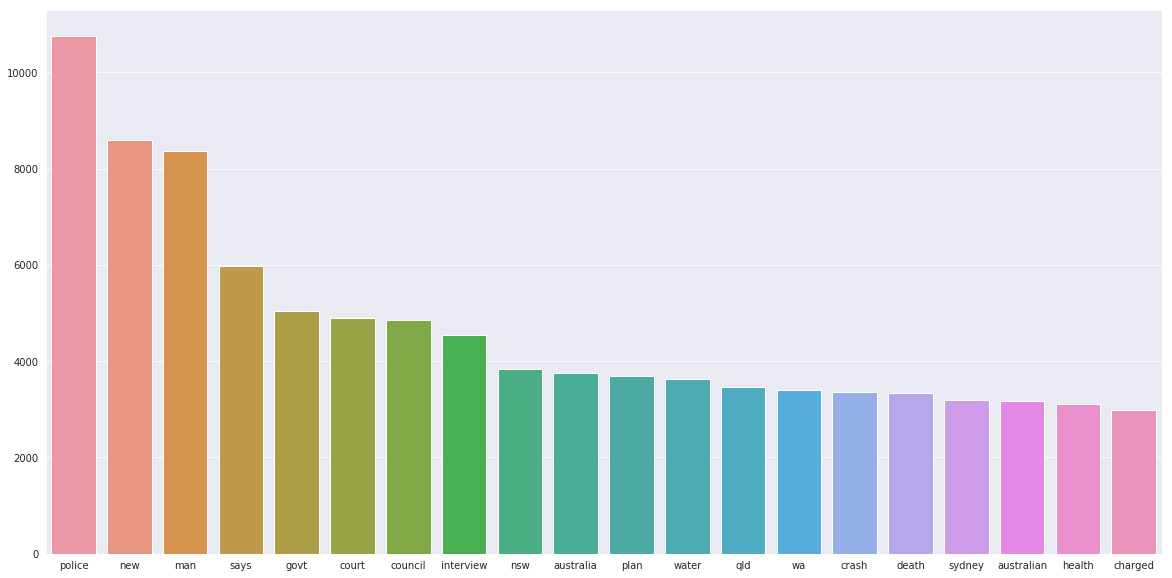

In [3]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=30000)

# Transform headlines
news = vectorizer.fit_transform(data['headline_text'])

'''Number of times a feature/word appears over the entire document''' 

# initialize empty dictionary
words = {}

# initialize with 0
i = 0

# Number of time every feature appears over the entire document
sums = np.array(np.sum(news, axis=0)).flatten()

# Loop to map 'sums' to its word
for word in vectorizer.get_feature_names():
    words[word] = sums[i]
    i += 1
    
# Top 20 most occuring words
top_20 = sorted(words.items(), key=operator.itemgetter(1), reverse=True)[:20]
top_20_words = [i[0] for i in top_20]
top_20_values = [i[1] for i in top_20]

# Display top 20 words
plt.figure(figsize=(20,10))
sns.barplot(top_20_words, top_20_values)
plt.show()

## Hints
- Initialize `vectorizer` as `CountVectorizer(stop_words='english', max_features=30000)`
- Fit and transform news headlines by `vectorizer.fit_transform(data['headline_text'])`
- Declare `sums` using `np.array(np.sum(news, axis=0)).flatten()`
- The for loop should be done as:
```python
for word in vectorizer.get_feature_names():
    words[word] = sums[i]
    i += 1
```
- `top_20` should be done as `sorted(words.items(), key=operator.itemgetter(1), reverse=True)[:20]`
- `top_20_words` should be declared as `[i[0] for i in top_20]`. Replace `[0]` with `[1]` for `top_20_values`

## Test Cases
- Variable declaration for `vectorizer`, `news`, `words`, `i`, `sums`, `top_20`, `top_20_words` and `top_20_values`
- Shape of `sums`: `sums.shape == (30000,)`
- Shape of `news`: `news.shape == (331100, 30000)`
- Sum of values of `sums`: `sums.sum() == 1633268`
- Length of `words` dictionary: `len(words) == 30000`
- Check for `'police'` key value in `words`: `words['police'] == 10752`
- Length of `top_20`: `len(top_20) == 20`
- Values of `top_20_words`: `top_20_words == ['police', 'new', 'man', 'says', 'govt', 'court', 'council', 'interview', 'nsw', 'australia', 'plan', 'water', 'qld', 'wa', 'crash', 'death', 'sydney', 'australian', 'health', 'charged']`
- Value of `top_20_values`: `top_20_values == [10752, 8599, 8368, 5987, 5048, 4898, 4856, 4552, 3831, 3765, 3702, 3633, 3456, 3412, 3354, 3338, 3195, 3179, 3118, 2993]`

## Topic Modelling with LSA

In the previous tasks you preprocessed data and also had a glimpse into possible words in your topics. Now use LSA (Latent Semantic Analysis) to assign topics to every headline. Since almost every word has some chance of getting assigned to a particular topic, you will be choosing only the 10 most important words for every topic


### Instructions
- First decide on the number of topics. Take it as `5` and save it as `n_topics`
- Initialize a truncated SVD model using `lsa_model = TruncatedSVD(n_components=n_topics, random_state=2)`
- Use `.fit_transform()` method of `las_model` on `news` to decompose `news`. This step essentially assigns a topic to every headline and should be of the shape `(number of headlines, number of topics)`
- Initialize an empty dictionary `topic_lsa` which stores topic number as keys and values as the linear combination of words for the topic
- Use a for loop to iterate over every topic and its index using `for i, topic in enumerate(lsa_mode.components_):`. Set variable `key` as `"Topic {}".format(i)` and `value` as the first 10 words with decreasing order of importance. You can extract `value` from `vectorizer.get_feature_names()` using `[(vectorizer.get_feature_names()[i] + '*' + str(topic[i])) for i in topic.argsort()[:-11:-1]]`
- Append `key`-`value` pair as `topic_lsa[key] = ' + '.join(value)`
- Use `pprint.print(topic_lsa)` to print out the topic dictionary 

In [4]:
# number of topics
n_topics = 5

# initialize SVD 
lsa_model = TruncatedSVD(n_components=n_topics, random_state=2)

# fit and transform 'news' 
lsa_topic_matrix = lsa_model.fit_transform(news)

'''We are not interested in knowing every word of a topic.
Instead, we want to look at the first (lets say) 10 words
of a topic'''

# empty dictionary to store topic number and top 10 words for every topic 
topic_lsa = {}

# loop over every topic
for i, topic in enumerate(lsa_model.components_):
    key = "Topic {}".format(i)
    value = [(vectorizer.get_feature_names()[i] + '*' + str(topic[i])) for i in topic.argsort()[:-11:-1]]
    topic_lsa[key] = ' + '.join(value)
    
# pretty print topics
pprint.pprint(topic_lsa, indent=4)

{   'Topic 0': 'police*0.8601893055234296 + man*0.3768739096108067 + '
               'new*0.12271851881220097 + court*0.08725441865819474 + '
               'charged*0.07895772747439263 + murder*0.07057005753940095 + '
               'car*0.06800066168033367 + crash*0.06584004218944997 + '
               'death*0.06572026639969189 + missing*0.06449235428724633',
    'Topic 1': 'man*0.7879343660155694 + new*0.19216278977456988 + '
               'court*0.1889989719994598 + charged*0.16465801643350908 + '
               'murder*0.09487034753363714 + accused*0.06813694764641971 + '
               'dies*0.06019737315017268 + jailed*0.053197209234676246 + '
               'guilty*0.048466720132490704 + face*0.04514251661316642',
    'Topic 2': 'new*0.9359950198542983 + says*0.0774970744961519 + '
               'council*0.07207682180024255 + govt*0.07006061280055706 + '
               'plan*0.042968652525611134 + zealand*0.040939956861881684 + '
               'australia*0.0365700640447206

## Hints
- Initialize SVD with `lsa_model = TruncatedSVD(n_components=n_topics)`
- Transform `news` as `lsa_model.fit_transform(news)`
- The for loop can be written as:
```python
for i, topic in enumerate(lsa_model.components_):
    key = "Topic {}".format(i)
    value = [(vectorizer.get_feature_names()[i] + '*' + str(topic[i])) for i in topic.argsort()[:-11:-1]]
    topic_lsa[key] = ' + '.join(value)
```

## Test Cases
- Variable declaration for `n_topics`, `lsa_model`, `lsa_topic_matrix` and `topic_lsa`
- Shape of `lsa_topic_matrix`: `lsa_topic_matrix.shape == (331100, 5)`
- Length of `topic_lsa`: `len(topic_lsa) == 5`
- Keys of `topic_lsa`: `list(topic_lsa.keys()) == ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4']`
- Values of `topic_lsa`: `list(topic_lsa.values()) == ['police*0.8601893055234294 + man*0.37687390961080625 + new*0.12271851881220121 + court*0.08725441865819465 + charged*0.07895772747439253 + murder*0.07057005753940089 + car*0.06800066168033363 + crash*0.06584004218944993 + death*0.06572026639969183 + missing*0.0644923542872463','man*0.7879343660155875 + new*0.19216278977449874 + court*0.18899897199946275 + charged*0.16465801643351283 + murder*0.09487034753363932 + accused*0.06813694764642098 + dies*0.060197373150173865 + jailed*0.05319720923467738 + guilty*0.048466720132491696 + face*0.0451425166131667','new*0.9359950198543132 + says*0.07749707449615463 + council*0.072076821800244 + govt*0.07006061280055853 + plan*0.042968652525611904 + zealand*0.040939956861882405 + australia*0.03657006404472174 + laws*0.03483920048765489 + wa*0.03471197141117831 + water*0.033517712686814444','says*0.796420640501846 + govt*0.3475660937899314 + council*0.17563972079881468 + plan*0.1149471191161721 + nsw*0.09394935272344758 + water*0.09240524400252528 + qld*0.09213172396303204 + wa*0.08420836644225402 + health*0.06971247854025085 + urged*0.06168945950868152','govt*0.5228696280194969 + council*0.40472501834883534 + court*0.23837403866676082 + plan*0.15194531896791644 + nsw*0.14275668193264318 + health*0.11707848880147864 + urged*0.10441379415285196 + water*0.07876063606031011 + qld*0.07356945094004429 + accused*0.06597753143431345']`

## Topic Modelling with with LDA

Use the `gensim` package to perform topic modelling with LDA (Latent Dirichlet Allocation) this time. A function `clean_doc` has been provided for you which removes stopwords and punctuation marks and also lemmatizes every word in headline.

### Instructions
- Initialize stopwords list `stop` using `set(stopwords.words('english'))`
- For removing punctuation marks, initialize `exclude` as ` set(string.punctuation)`
- Initialize a lemmatizer object `lemma` as `WordNetLemmatizer()`
- Convert all headlines to a list `headlines` using `.tolist()` method on the series pandas containing headlines
- Now clean `headlines` using `clean_doc()` function which takes input as one headline and returns the cleaned headline. Use a list comprehension like `[clean_doc(row) for row in a_list]`. Use this list comprehension to clean every headline of `headlines` and save it as `clean_headlines`
- Create a dictionary corpus where every unique term is assigned an index using `corpora.Dictionary()`. Pass the cleaned headlines `clean_headlines` as argument to it and save it as `dictionary`
- Now create a Document Term matrix using `.doc2bow()` method of `dictionary` on every headline of `clean_headlines` with the help of a list comprehension using `[dictionary.doc2bow(doc) for doc in clean_headlines]`. Save this document term matrix as `doc_term_matrix`
- Initialize an LDA model using `LDAModel()` and pass arguments as `doc_term_matrix`, `num_topics=5`, `id2word = dictionary`, `random_state=2` and `iterations=10`. Save this model as `lda_model`
- Then extract the 5 topics using `.print_topics()` method of `lda_model` containing only the 10 most relevant words by pass arguments `num_topics=5` and `num_words=10`. Save the output as `topics`. Using `.pprint()` method of `pprint` print out `topics` to observe the topics

In [5]:
# Learners code: Function to clean data from stopwords, punctuation marks and lemmatize
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


# Code starts here

# stopwords list
stop = set(stopwords.words('english'))

# string punctuations 
exclude = set(string.punctuation)

# lemmatizer
lemma = WordNetLemmatizer()

# convert headlines to list
headlines = data['headline_text'].tolist()

# cleaned data
clean_headlines = [clean(doc).split() for doc in headlines]

# Creating the term dictionary of our courpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(clean_headlines)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_headlines]

# build LDA model
lda_model = LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary, iterations=10, random_state=2)

# extract topics for headlines
topics = lda_model.print_topics(num_topics=5, num_words=10)

# pprint topics
pprint.pprint(topics)

# Code ends here

[(0,
  '0.014*"australia" + 0.010*"south" + 0.010*"adelaide" + 0.009*"election" + '
  '0.008*"first" + 0.008*"win" + 0.007*"council" + 0.007*"open" + 0.007*"take" '
  '+ 0.007*"new"'),
 (1,
  '0.014*"new" + 0.013*"wa" + 0.012*"nsw" + 0.011*"government" + 0.011*"call" '
  '+ 0.010*"queensland" + 0.010*"say" + 0.008*"sa" + 0.007*"canberra" + '
  '0.007*"school"'),
 (2,
  '0.014*"police" + 0.014*"man" + 0.010*"woman" + 0.010*"death" + '
  '0.010*"world" + 0.010*"sydney" + 0.008*"year" + 0.008*"perth" + 0.008*"one" '
  '+ 0.008*"crash"'),
 (3,
  '0.018*"say" + 0.016*"trump" + 0.015*"u" + 0.012*"melbourne" + 0.012*"child" '
  '+ 0.008*"australian" + 0.007*"australia" + 0.007*"china" + '
  '0.007*"interview" + 0.006*"hour"'),
 (4,
  '0.014*"court" + 0.009*"murder" + 0.008*"sex" + 0.007*"market" + '
  '0.007*"family" + 0.007*"change" + 0.007*"face" + 0.006*"police" + '
  '0.006*"charge" + 0.006*"man"')]


## Hints
- Initialize `stop`, `exclude` and `lemma` as:
```python
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
```
- Save `headlines` as `data['headline_text'].tolist()`
- Save `cleaned_headlines` as `[clean(doc).split() for doc in headlines]`
- Initialize `dictionary` as `corpora.Dictionary(clean_headlines)`
- Create `doc_term_matrix` as `[dictionary.doc2bow(doc) for doc in clean_headlines]`
- Initialize `lda_model` as `LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary, iterations=10)`
- Extract `topics` using `lda_model.print_topics(num_topics=5, num_words=10)`


## Test Cases
- Variable declaration for `stop`, `exclude`, `lemma`, `headlines`, `clean_headlines`, `dictionary`, `doc_term_matrix`, `lda_model`, `topics`
- Length of `headlines`: `len(headlines) == 331100`
- First value of `headlines`: `headlines[0] == 'police defend aboriginal tent embassy raid'`
- Length of `clean_headlines`: `len(clean_headlines) == 331100`
- First value of `clean_headlines`: `clean_headlines[0] == ['police', 'defend', 'aboriginal', 'tent', 'embassy', 'raid']`
- Length of `doc_term_matrix`: `len(doc_term_matrix) == 331100`
- First value of `doc_term_matrix`: `doc_term_matrix[0] == [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]`
- Length of `topics`: `len(topics) == 5`
- Topic numbers in `topics`: `[i[0] for i in topics] == [0, 1, 2, 3, 4]`
- Values for `topics`: `topics == [(0,
  '0.014*"australia" + 0.010*"south" + 0.010*"adelaide" + 0.009*"election" + '
  '0.008*"first" + 0.008*"win" + 0.007*"council" + 0.007*"open" + 0.007*"take" '
  '+ 0.007*"new"'),
 (1,
  '0.014*"new" + 0.013*"wa" + 0.012*"nsw" + 0.011*"government" + 0.011*"call" '
  '+ 0.010*"queensland" + 0.010*"say" + 0.008*"sa" + 0.007*"canberra" + '
  '0.007*"school"'),
 (2,
  '0.014*"police" + 0.014*"man" + 0.010*"woman" + 0.010*"death" + '
  '0.010*"world" + 0.010*"sydney" + 0.008*"year" + 0.008*"perth" + 0.008*"one" '
  '+ 0.008*"crash"'),
 (3,
  '0.018*"say" + 0.016*"trump" + 0.015*"u" + 0.012*"melbourne" + 0.012*"child" '
  '+ 0.008*"australian" + 0.007*"australia" + 0.007*"china" + '
  '0.007*"interview" + 0.006*"hour"'),
 (4,
  '0.014*"court" + 0.009*"murder" + 0.008*"sex" + 0.007*"market" + '
  '0.007*"family" + 0.007*"change" + 0.007*"face" + 0.006*"police" + '
  '0.006*"charge" + 0.006*"man"')]`

## Coherence score to determine the optimum number of topics

Are 5 topics sufficient for summarizing all the given news headlines? Well, use the power of coherence scores to determine what should be the number of topics for the data

### Instructions
- Initialize a model `coherence_model_lda` to determine the coherence score with the trained LDA model `lda_model`. USe `CoherenceModel()` function with arguments `model=lda_model`, `texts=clean_headlines`, `dictionary=dictionary` and `coherence='c_v'`
- Calculate the coherence score for your trained LDA model `lda_model` using `.get_coherence()` method of `coherence_model_lda`. Save it as `coherence_lda` and print it out to check the coherence score with 5 topics
- Now define a function `compute_coherence_values` which takes inputs `dictionary` (gensim dictionary), `corpus` (gensim corpus), `texts` (list of input texts), `limit` (maximum number of topics), `start=2` (default minimum of 2 topics) and `step` (calculate coherence score with `step` + 2n topics) and returns `model_list` (list of LDA topic models) and `coherence_values` (Coherence values corresponding to the LDA model with respective number of topics)
- Initialize two empty lists `coherence_values` and `model_list` to store the coherence scores and the LDA model
- Iterate using a for loop from `start` to `limit` with step size of `step`. Within the for loop:
     - Initialize LDA object called `model` using `gensim.models.ldamodel.LdaModel()` and pass arguments `doc_term_matrix`, `num_topics=num_topics`, `random_state=2`, `id2word=dictionary` and `iterations=10`
     - Append `model` to `model_list`
     - Initialize a coherence object `coherence_model` using `CoherenceModel()` which takes arguments `model=model`, `texts=texts`, `dictionary=dictionary` and `coherence='c_v'`
     - Append the coherence score `coherence_model.get_coherence()` to `coherence_values`
     
- Return the lists `model_list` and `coherence_values`
- You will be checking from 2 to 50 total topics with a step size of 6 i.e. 2, 8, 14, ...., 44, 50 topics
- Pass the arguments `dictionary=dictionary`, `corpus=doc_term_matrix`, `texts=clean_headlines`, `start=2`, `limit=50`, `step=6` and save its outcomes as two variables `model_list` and `coherence_values`
- Declare a variable `x` which takes values from 2 to 50 with step size of 6
- Using `.plot()` method of `plt` plot a line plot with `coherence_values` on Y-axes and `x` on X-axes
- Set X-axes label as `"Num Topics"` and Y-axes label as `"Coherence score"` and display the plot with `.plot()` method of `plt`

0.27358510704243366
[0.28, 0.28, 0.28, 0.29, 0.33, 0.37, 0.4, 0.42]


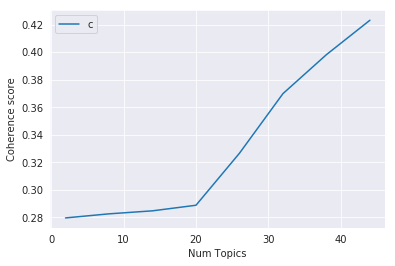

In [6]:
# coherence score

coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_headlines, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

# Function to calculate coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, random_state = 2, num_topics=num_topics, id2word = dictionary, iterations=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=clean_headlines, start=2, limit=50, step=6)
print([round(i,2) for i in coherence_values])

# Plotting
limit=50; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## Hints
- Initialize `coherence_model_lda` with `CoherenceModel(model=lda_model, texts=clean_headlines, dictionary=dictionary, coherence='c_v'`
- Calculate coherence score `coherence_lda` with `coherence_model_lda.get_coherence()`
- The function `compute_coherence_values` can be declared in the following way:
```python
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, random_state=2, num_topics=num_topics, id2word = dictionary, iterations=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
```
- Declare `x` as `x = range(start, limit, step)`
- The plotting commandsa can be written as:
```python
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
```


## Test Cases
- Variable declaration for `coherence_model_lda`, `coherence_lda`, `model_list`, `coherence_values` and `x`
- Function declaration for `compute_coherence_values`
- Value for `coherence_lda`: `round(coherence_lda, 2) == 0.27`
- Length of `model_list` and `coherence_values`: `len(model_list) == 8 and len(coherence_values) == 8`
- Values of `coherence_values`: `[round(i,2) for i in coherence_values] == [0.28, 0.28, 0.28, 0.29, 0.33, 0.37, 0.4, 0.42]`